In [1]:
#Import the libraries
import tensorflow as tf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#Libs from tensorflow--------
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

# Libs from sklearn-----------
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score


#style of ploting
plt.style.use('fivethirtyeight')


#GPU lib imports - 
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

C:\Users\thiag\miniconda3\envs\tensorflow\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Found GPU at: /device:GPU:0


In [2]:
#load the dataframe
df=pd.read_csv('fullpatientdf.csv')

In [3]:
#View The dataframe head
df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,1,0,0
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,2,0,0
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,3,0,0
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,4,0,0
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,5,0,0
5,94.0,97.0,36.50,127.0,78.33,NaN,25.0,NaN,NaN,30.0,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,6,0,0
6,92.0,97.0,NaN,123.0,NaN,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,7,0,0
7,94.0,100.0,35.83,120.0,95.33,NaN,21.0,NaN,3.0,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,8,0,0
8,94.0,NaN,37.11,133.5,78.33,55.0,20.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,9,0,0
9,90.5,94.0,35.89,137.0,84.00,50.5,20.5,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,10,0,0


In [4]:
#View The dataframe head
df.tail(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_Id
1552200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,45,0,40335
1552201,76.0,99.0,36.8,115.0,60.0,43.0,24.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,46,0,40335
1552202,96.0,96.0,NaN,120.0,63.0,47.0,22.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,47,0,40335
1552203,91.0,96.5,NaN,126.5,73.5,56.5,23.5,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,48,0,40335
1552204,88.0,97.0,NaN,121.0,62.0,44.0,25.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,49,0,40335
1552205,88.0,97.0,NaN,108.0,56.0,39.0,21.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,50,0,40335
1552206,87.5,94.5,36.5,121.5,66.0,49.0,21.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,51,0,40335
1552207,88.0,98.0,NaN,124.0,67.0,49.0,18.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,52,0,40335
1552208,74.0,97.0,NaN,111.0,83.0,61.0,20.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,53,0,40335
1552209,71.0,97.0,36.2,121.0,63.0,44.0,21.0,NaN,NaN,NaN,...,NaN,NaN,72.0,1,1.0,0.0,-40.63,54,0,40335


In [5]:
#View the shape of the dataste
dfshape = df.shape
dfshape

(1552210, 42)

In [6]:
#view the size of the dataset
dfsize = df.size
dfsize

65192820

In [7]:
#avg counter
group_by_SepsisLabel = df.groupby(by=['SepsisLabel'])
SepsisLabel_avg = group_by_SepsisLabel.mean()

SepsisLabel_avg


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,Patient_Id
SepsisLabel,,,,,,,,,,,,,,,,,,,,,
0,84.465334,97.197724,36.972202,123.792359,82.442375,63.864454,18.694357,32.986365,-0.701775,24.085660,...,11.401411,286.039084,196.203986,62.009045,0.558646,0.494935,0.505065,-55.706786,26.469893,20094.249596
1,90.785245,96.994425,37.250813,121.445982,80.168490,62.018848,20.460376,32.434268,-0.352468,23.702144,...,13.325927,327.833333,187.853978,62.032591,0.593316,0.595252,0.404748,-78.967332,55.666929,18041.245057


In [8]:
#Separating Patient ID and Sepsis Label from all the data they will be used as labels 
attributes=df.drop(['SepsisLabel','Patient_Id'],axis=1)


In [9]:
# check the head of the attributes
attributes.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,1
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,2
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,3
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,4
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,5


In [10]:
#check the shape of the attribute
attributes.shape

(1552210, 40)

In [11]:
#check attributes size
attributes.size

62088400

In [12]:
#Finding the % of missing data for every attribute

missing_data=attributes.isnull().sum()*100/attributes.shape[0]

In [13]:
#check the missing data
missing_data

HR                   9.882619
O2Sat               13.061119
Temp                66.162697
SBP                 14.576958
MAP                 12.451279
DBP                 31.345887
Resp                15.354559
EtCO2               96.286843
BaseExcess          94.579020
HCO3                95.810618
FiO2                91.665754
pH                  93.069688
PaCO2               94.440121
SaO2                96.549372
AST                 98.377604
BUN                 93.134434
Alkalinephos        98.393194
Calcium             94.116067
Chloride            95.460279
Creatinine          93.904433
Bilirubin_direct    99.807371
Glucose             82.894325
Lactate             97.329872
Magnesium           93.689578
Phosphate           95.986303
Potassium           90.689082
Bilirubin_total     98.509158
TroponinI           99.047745
Hct                 91.145979
Hgb                 92.617558
PTT                 97.055875
WBC                 93.593199
Fibrinogen          99.340167
Platelets 

In [14]:
missing_factor = 90 # change the value if want to increase or drop the %
cols=list(missing_data[missing_data<missing_factor].index)

In [15]:

#Dropping all the columns from attributes data which are 90% missing_data
attributes=df[cols]

In [16]:
# check attributes head after drop
attributes.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0,-663.55,1
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,66.33,1,1.0,0.0,-663.55,2
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,66.33,1,1.0,0.0,-663.55,3
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,66.33,1,1.0,0.0,-663.55,4
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,66.33,1,1.0,0.0,-663.55,5


In [17]:
# check attributes shape after drop
attributes.shape


(1552210, 14)

In [18]:
#check attributes size after drop
attributes.size

21730940

In [19]:
#Drop hosp time and iculos
attributes=attributes.drop(['ICULOS'],axis=1)
attributes=attributes.drop(['HospAdmTime'],axis=1)

In [20]:
attributes.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.33,1,1.0,0.0
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,66.33,1,1.0,0.0
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,66.33,1,1.0,0.0
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,66.33,1,1.0,0.0
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,66.33,1,1.0,0.0


In [21]:
#Filling the data with mean

attributes = attributes.apply(lambda x: x.fillna(x.mean()))

In [22]:
#check the attributes head after add the mean data
attributes.head(5)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,Gender,Unit1,Unit2
0,84.581443,97.193955,36.977228,123.750465,82.4001,63.830556,18.726498,136.932283,66.33,1,1.0,0.0
1,106.000000,98.000000,36.977228,141.000000,102.3300,63.830556,24.000000,136.932283,66.33,1,1.0,0.0
2,109.000000,94.000000,36.977228,144.000000,82.0000,63.830556,23.000000,136.932283,66.33,1,1.0,0.0
3,102.000000,94.000000,36.890000,124.000000,78.6700,63.830556,22.000000,136.932283,66.33,1,1.0,0.0
4,95.000000,97.000000,36.977228,120.000000,73.3300,63.830556,21.000000,136.932283,66.33,1,1.0,0.0


In [23]:
#Converting the DataFrame to array
featurearr=attributes.iloc[:,:].values

In [24]:
#checking features array 
featurearr.shape

(1552210, 12)

In [25]:
#checking features array size
featurearr.size

18626520

In [26]:
#attributes.to_csv('Test.csv')


In [27]:
df.head(5)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,1,0,0
1,106.0,98.0,NaN,141.0,102.33,NaN,24.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,2,0,0
2,109.0,94.0,NaN,144.0,82.00,NaN,23.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,3,0,0
3,102.0,94.0,36.89,124.0,78.67,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,4,0,0
4,95.0,97.0,NaN,120.0,73.33,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,66.33,1,1.0,0.0,-663.55,5,0,0


In [28]:
# defining labels
label=df[['SepsisLabel',"Patient_Id"]]

In [29]:
#checking label shape
label.shape

(1552210, 2)

In [30]:
#creating array of abels
yarr=label.iloc[:].values

In [31]:
patientid=df['Patient_Id'].values.tolist()

In [32]:
#creating a data set appending all patient hourly data to a single row otherwise the model will get mixed
c=0
ip=[]
yp=[]
seq=[]
#index where to start
index=0
#loop to iterate all the array
for i in range(len(patientid)):
  if i==0:
    
    seq+=featurearr[index].tolist()
    
    index+=1
    
    continue
    
  if patientid[i]!=patientid[i-1]:
    
    ip.append(seq) # append patient to the list
    
    yp+=[yarr[i-1,0]]
    
    seq=[]
    
  if yarr[i,0]==0:
    
    seq+=featurearr[index].tolist()
    
  elif yarr[i,0]==1 and patientid[i-1]!=patientid[i]:
    
    seq+=featurearr[index].tolist()
    
  index+=1

ip.append(seq)

yp+=[yarr[i-1,0]]


In [33]:
#find number of patients with sepsis as m
m=0
for i in yp:
    if i==1:
        m+=1


In [34]:
#check the number of hours for each patient ICULOS
max=0
for i in ip:
    if max<len(i):
        max=len(i)


In [35]:
#Features Data
x=np.array(ip)

In [36]:
#Labels
y=np.array(yp)

In [37]:
#Making the data Categorical data to improve memory usage
#
y=to_categorical(y)

In [38]:
#padding zeros to patient hours that are not max
x = sequence.pad_sequences(x, maxlen=max)

In [39]:
#Spliiting data set in ratio 7:3 for training and testing
splitfactor = 0.3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=splitfactor,random_state=0)

x_train



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [40]:
#view y train
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [41]:
#view x test
x_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [42]:
#view y test
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [43]:
# remove this only for calc 
print('Training Set:')
print('attributes',x_train.shape,'\nLabel',y_train.shape)
print('Testing Set:')
print('attributes',x_test.shape,'\nLabel',y_test.shape)

Training Set:
attributes (28235, 4032) 
Label (28235, 2)
Testing Set:
attributes (12101, 4032) 
Label (12101, 2)


In [44]:
#define the model adding layers method
rnn_model = Sequential()


In [45]:
#define the model using the constructor
#rnn_model = Sequential(All the information and layers should be add here)

In [46]:
#defining the embedding lenght
evl = 32

In [47]:
#add embedding layer
rnn_model.add(Embedding(1000, evl, input_length=max))

In [48]:
#add the first conv1d layer
rnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [49]:
# add the maxPooling layer
rnn_model.add(MaxPooling1D(pool_size=2))

In [50]:
# add a flatten layer
rnn_model.add(Flatten())

In [51]:
# add the first dense layer 128out relu
rnn_model.add(Dense(128, activation='relu'))

In [52]:
# add the second layer 2 output softmax
rnn_model.add(Dense(2, activation='softmax'))

In [53]:
# compile the module
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
#display the model summary
print(rnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4032, 32)          32000     
_________________________________________________________________
conv1d (Conv1D)              (None, 4032, 64)          6208      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2016, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 129024)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16515200  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 16,553,666
Trainable params: 16,553,666
Non-trainable params: 0
____________________________________________

In [55]:
#training the model
history = rnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)

Train on 28235 samples, validate on 12101 samples
Epoch 1/10
28235/28235 [==============================] - 271s 10ms/sample - loss: 0.1673 - accuracy: 0.9592 - val_loss: 0.1484 - val_accuracy: 0.9620
Epoch 2/10
28235/28235 [==============================] - 268s 10ms/sample - loss: 0.1443 - accuracy: 0.9630 - val_loss: 0.1843 - val_accuracy: 0.9622
Epoch 3/10
28235/28235 [==============================] - 265s 9ms/sample - loss: 0.1438 - accuracy: 0.9632 - val_loss: 0.1496 - val_accuracy: 0.9617
Epoch 4/10
28235/28235 [==============================] - 268s 9ms/sample - loss: 0.1383 - accuracy: 0.9638 - val_loss: 0.1543 - val_accuracy: 0.9618
Epoch 5/10
28235/28235 [==============================] - 269s 10ms/sample - loss: 0.1311 - accuracy: 0.9652 - val_loss: 0.1594 - val_accuracy: 0.9623
Epoch 6/10
28235/28235 [==============================] - 267s 9ms/sample - loss: 0.1270 - accuracy: 0.9668 - val_loss: 0.1660 - val_accuracy: 0.9582
Epoch 7/10
28235/28235 [=======================

In [56]:
#define y pred
y_pred=rnn_model.predict(x_test)

In [57]:
#view y pred
y_pred

array([[9.94200349e-01, 5.79966605e-03],
       [9.99960184e-01, 3.97849217e-05],
       [9.96253490e-01, 3.74643994e-03],
       ...,
       [9.91435945e-01, 8.56403355e-03],
       [8.99602711e-01, 1.00397296e-01],
       [9.97346997e-01, 2.65294081e-03]], dtype=float32)

In [58]:
#view y pred shaep
y_pred.shape

(12101, 2)

In [59]:
#round up ypred
y_pred1=np.round(y_pred)

In [60]:
ypred=[]
for i in y_pred1:
  if i[0]==0:
    ypred.append(1)
  else:
    ypred.append(0)

In [61]:
ytest=[]
for i in y_test:
  if i[0]==0:
    ytest.append(1)
  else:
    ytest.append(0)

In [62]:
#view the accuracy score
accuracy_score(ytest,ypred)

0.9600859433104703

In [63]:
#view the cf
cm=confusion_matrix(ytest,ypred)
cm

array([[11125,    92],
       [  391,   493]], dtype=int64)

In [64]:
#View the true positive
TP = cm [1][1]
TP

493

In [65]:
#View the false positive
FP = cm [0][1]
FP

92

In [66]:
#View the false negative
FN = cm [1][0]
FN

391

In [67]:
#View the true negative
TN = cm [0][0]
TN

11125

In [68]:
# Calculate the recall
reccalf = TP/(FN+TP)
reccalf

0.5576923076923077

In [69]:
#calculate true negative rate
tnr = FP / (FP+TP)
tnr

0.15726495726495726

In [70]:
#calculate precision
prc = TP / (FP+TP)
prc


0.8427350427350427

In [71]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


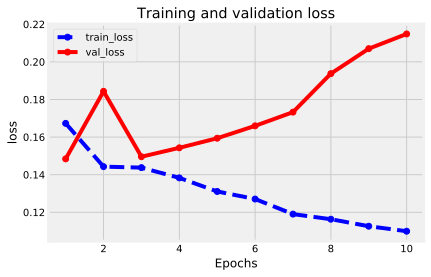

In [72]:
plot_metric(history, 'loss') 

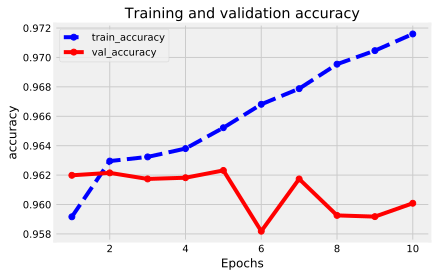

In [73]:
plot_metric(history, 'accuracy')

In [74]:
rnn_model.evaluate(x = x_test ,y = y_test)

12101/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.21484381180330797, 0.9600859]

In [75]:
predictions = rnn_model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)

In [76]:
y_pred

array([[9.94200349e-01, 5.79966605e-03],
       [9.99960184e-01, 3.97849217e-05],
       [9.96253490e-01, 3.74643994e-03],
       ...,
       [9.91435945e-01, 8.56403355e-03],
       [8.99602711e-01, 1.00397296e-01],
       [9.97346997e-01, 2.65294081e-03]], dtype=float32)

In [77]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
recall_score(ytest, ypred, average='macro')

0.7747452355970676

In [79]:
recall_score(ytest, ypred, average='micro')

0.9600859433104703

In [80]:
recall_score(ytest, ypred, average='weighted')

0.9600859433104703

In [81]:
recall_score(ytest, ypred, average=None, zero_division=1)

array([0.99179816, 0.55769231])

In [82]:
recall_score(ytest, ypred, average=None)

array([0.99179816, 0.55769231])